In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../data/cleaned/utah_2017_vineyard.csv')

In [3]:
df.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
0,5/5/2017,0:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4
1,5/5/2017,0:15,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4
2,5/5/2017,0:30,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4
3,5/5/2017,0:45,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4
4,5/5/2017,1:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4


In [4]:
timestamp = pd.to_datetime(df['Date (mm.dd.yyyy)'] + ' '+ df['Time 24hr'])
df['Timestamp'] = timestamp
df = df.set_index('Timestamp')
df = df.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr'])

In [5]:
df.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
Timestamp,,,,,,,,,,
2017-05-05 00:00:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4
2017-05-05 00:15:00,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4
2017-05-05 00:30:00,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4
2017-05-05 00:45:00,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4
2017-05-05 01:00:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4


In [15]:
def show_graphs(dataframe, target_col):
    f, axes = plt.subplots(nrows=len(dataframe.columns), ncols=1,figsize=(10,50))
    plt.subplots_adjust(hspace=0.3)
    for i, col in enumerate(dataframe.columns):
        if col != target_col:
            dataframe[col].plot(ax=axes[i], title=col)
            dataframe[target_col].plot(ax=axes[i])
            axes[i].legend(loc="best")     

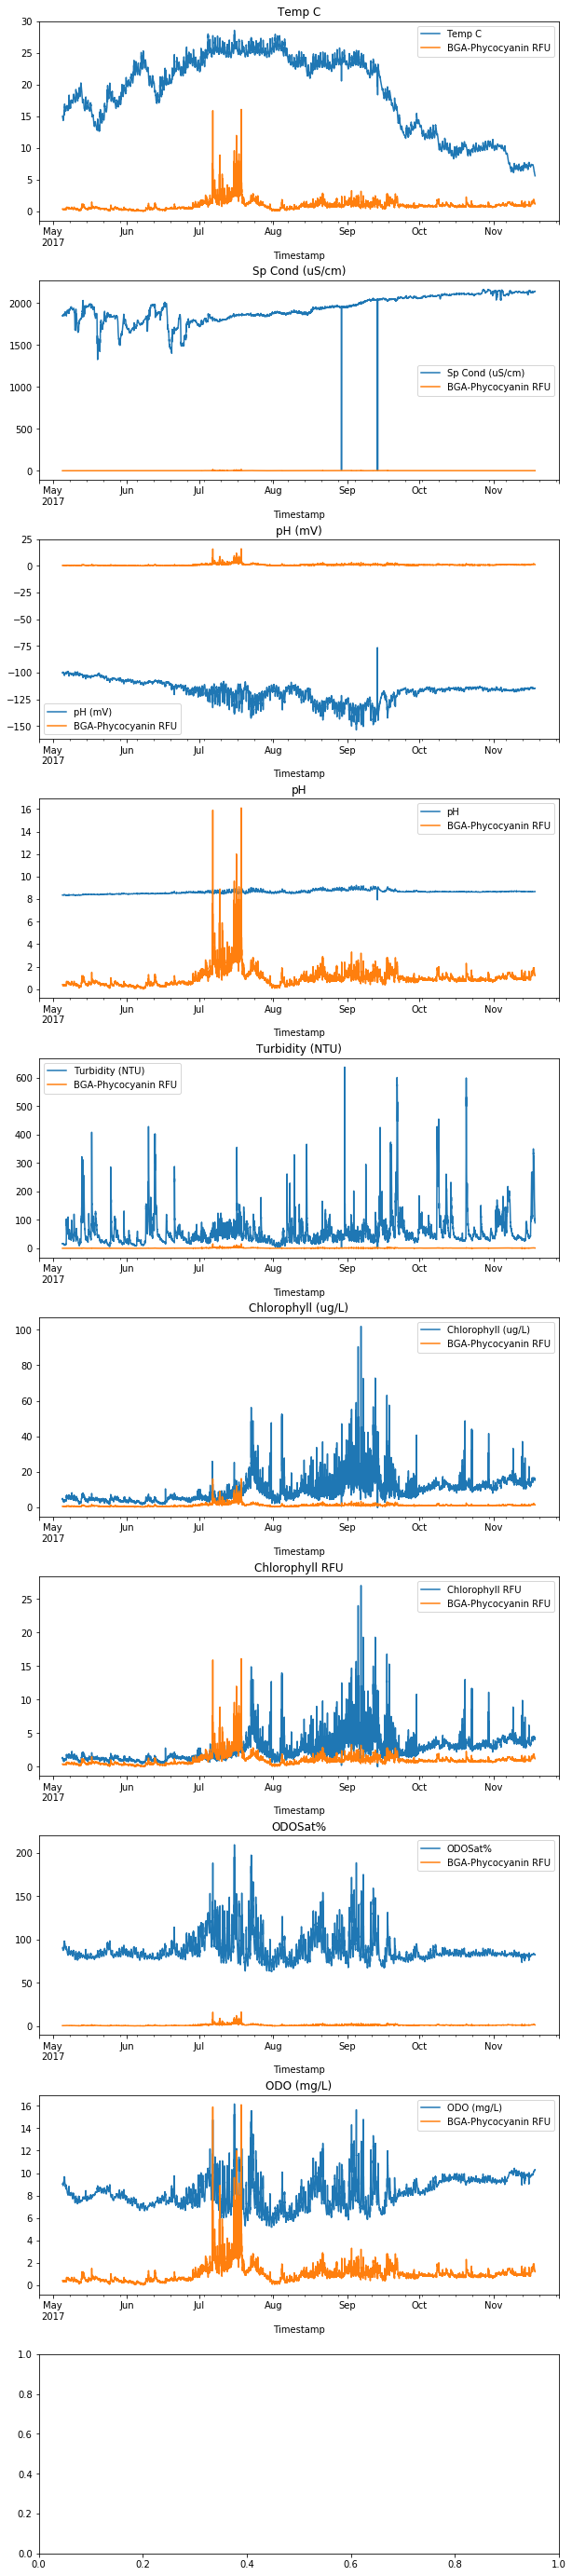

In [16]:
show_graphs(df, 'BGA-Phycocyanin RFU')